# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this project, application of one layer Autoencoder in compressing image and noise cancellation is considered. CIFAR-10 database images are used.  

In [1]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Model
from keras import regularizers
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [2]:
(x_train, _ ), (x_test, _ ) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[0:50]/255 - 0.5
x_test = x_train[0:50]/255 - 0.5
X_train = x_train
X_test = x_train
X = x_train

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [3]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    #encoder.add(Dense(code_size))
    # The decoder
    decoder = Sequential()
    #decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32
    decoder.add(Reshape(img_shape))
    return encoder, decoder

In [4]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

In [5]:
def visualizenoise(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    plt.subplot(1,3,1)
    plt.title("Image with Noise")
    show_image(img)
    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))
    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

In [6]:
def apply_gaussian_noise(X, sigma=0.09):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

In [7]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

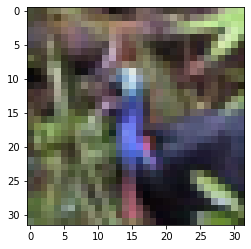

In [8]:
show_image(X[24])

### <span style='font-family:"Times New Roman"'>Building encoder and decoder::

In [9]:
IMG_SHAPE = X.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 50)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

In [10]:
print('Autoencoder summary:')
print(autoencoder.summary())

Autoencoder summary:
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3072)              0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 32, 32, 3)         9440256   
Total params: 9,440,256
Trainable params: 9,440,256
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = autoencoder.fit(X_train, X_train,
                epochs=5000,
                batch_size=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50 samples, validate on 50 samples
Epoch 1/5000
50/50 [==============================] - 0s 5ms/step - loss: 0.1288 - val_loss: 1.8293
Epoch 2/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.1971 - val_loss: 0.7752
Epoch 3/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.1373
Epoch 4/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.4204
Epoch 5/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.6085
Epoch 6/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.0678 - val_loss: 0.4831
Epoch 7/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.2323
Epoch 8/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.0758
Epoch 9/5000
50/50 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0917
Epoch 10/5000
50/50 [==============================] - 0

Epoch 81/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2244e-04 - val_loss: 0.0114
Epoch 82/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1687e-04 - val_loss: 0.0114
Epoch 83/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1180e-04 - val_loss: 0.0114
Epoch 84/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0717e-04 - val_loss: 0.0114
Epoch 85/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0282e-04 - val_loss: 0.0114
Epoch 86/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.8624e-05 - val_loss: 0.0114
Epoch 87/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.4553e-05 - val_loss: 0.0114
Epoch 88/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.0653e-05 - val_loss: 0.0114
Epoch 89/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.6988e-05 - val_loss: 0.0114
Epoch 90/5000
50/50 [==============================] - 

Epoch 159/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.7491e-06 - val_loss: 0.0109
Epoch 160/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.4993e-06 - val_loss: 0.0109
Epoch 161/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.2567e-06 - val_loss: 0.0109
Epoch 162/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.0212e-06 - val_loss: 0.0109
Epoch 163/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.7925e-06 - val_loss: 0.0109
Epoch 164/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.5704e-06 - val_loss: 0.0109
Epoch 165/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.3545e-06 - val_loss: 0.0109
Epoch 166/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.1448e-06 - val_loss: 0.0109
Epoch 167/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.9411e-06 - val_loss: 0.0108
Epoch 168/5000
50/50 [========================

Epoch 237/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5681e-06 - val_loss: 0.0108
Epoch 238/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5343e-06 - val_loss: 0.0108
Epoch 239/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5014e-06 - val_loss: 0.0108
Epoch 240/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4691e-06 - val_loss: 0.0108
Epoch 241/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4376e-06 - val_loss: 0.0108
Epoch 242/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4068e-06 - val_loss: 0.0108
Epoch 243/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3767e-06 - val_loss: 0.0108
Epoch 244/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3473e-06 - val_loss: 0.0108
Epoch 245/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3185e-06 - val_loss: 0.0108
Epoch 246/5000
50/50 [========================

Epoch 315/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.9746e-07 - val_loss: 0.0107
Epoch 316/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.9120e-07 - val_loss: 0.0107
Epoch 317/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.8508e-07 - val_loss: 0.0107
Epoch 318/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.7909e-07 - val_loss: 0.0107
Epoch 319/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.7322e-07 - val_loss: 0.0107
Epoch 320/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.6747e-07 - val_loss: 0.0107
Epoch 321/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.6184e-07 - val_loss: 0.0107
Epoch 322/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.5633e-07 - val_loss: 0.0107
Epoch 323/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.5093e-07 - val_loss: 0.0107
Epoch 324/5000
50/50 [========================

Epoch 393/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.5102e-08 - val_loss: 0.0107
Epoch 394/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.3896e-08 - val_loss: 0.0107
Epoch 395/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.2715e-08 - val_loss: 0.0107
Epoch 396/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.1560e-08 - val_loss: 0.0107
Epoch 397/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.0429e-08 - val_loss: 0.0107
Epoch 398/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.9322e-08 - val_loss: 0.0107
Epoch 399/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.8238e-08 - val_loss: 0.0107
Epoch 400/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.7178e-08 - val_loss: 0.0107
Epoch 401/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.6140e-08 - val_loss: 0.0107
Epoch 402/5000
50/50 [========================

Epoch 471/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.3059e-09 - val_loss: 0.0107
Epoch 472/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.0894e-09 - val_loss: 0.0107
Epoch 473/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.8777e-09 - val_loss: 0.0107
Epoch 474/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.6708e-09 - val_loss: 0.0107
Epoch 475/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.4685e-09 - val_loss: 0.0107
Epoch 476/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.2708e-09 - val_loss: 0.0107
Epoch 477/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.0776e-09 - val_loss: 0.0107
Epoch 478/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.8887e-09 - val_loss: 0.0107
Epoch 479/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.7041e-09 - val_loss: 0.0107
Epoch 480/5000
50/50 [========================

Epoch 549/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3939e-09 - val_loss: 0.0107
Epoch 550/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3592e-09 - val_loss: 0.0107
Epoch 551/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3254e-09 - val_loss: 0.0107
Epoch 552/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2924e-09 - val_loss: 0.0107
Epoch 553/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2601e-09 - val_loss: 0.0107
Epoch 554/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2287e-09 - val_loss: 0.0107
Epoch 555/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1980e-09 - val_loss: 0.0107
Epoch 556/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1680e-09 - val_loss: 0.0107
Epoch 557/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1388e-09 - val_loss: 0.0107
Epoch 558/5000
50/50 [========================

Epoch 627/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8239e-10 - val_loss: 0.0107
Epoch 628/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7754e-10 - val_loss: 0.0107
Epoch 629/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7281e-10 - val_loss: 0.0107
Epoch 630/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6819e-10 - val_loss: 0.0107
Epoch 631/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6370e-10 - val_loss: 0.0107
Epoch 632/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5933e-10 - val_loss: 0.0107
Epoch 633/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5506e-10 - val_loss: 0.0107
Epoch 634/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5092e-10 - val_loss: 0.0107
Epoch 635/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4686e-10 - val_loss: 0.0107
Epoch 636/5000
50/50 [========================

Epoch 705/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.0640e-11 - val_loss: 0.0107
Epoch 706/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.0050e-11 - val_loss: 0.0107
Epoch 707/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.9478e-11 - val_loss: 0.0107
Epoch 708/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8922e-11 - val_loss: 0.0107
Epoch 709/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8384e-11 - val_loss: 0.0107
Epoch 710/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7858e-11 - val_loss: 0.0107
Epoch 711/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7346e-11 - val_loss: 0.0107
Epoch 712/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6849e-11 - val_loss: 0.0107
Epoch 713/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6368e-11 - val_loss: 0.0107
Epoch 714/5000
50/50 [========================

Epoch 783/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.0373e-12 - val_loss: 0.0107
Epoch 784/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.9765e-12 - val_loss: 0.0107
Epoch 785/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.9176e-12 - val_loss: 0.0107
Epoch 786/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8605e-12 - val_loss: 0.0107
Epoch 787/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8055e-12 - val_loss: 0.0107
Epoch 788/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7517e-12 - val_loss: 0.0107
Epoch 789/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6985e-12 - val_loss: 0.0107
Epoch 790/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6481e-12 - val_loss: 0.0107
Epoch 791/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5995e-12 - val_loss: 0.0107
Epoch 792/5000
50/50 [========================

Epoch 861/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.0796e-13 - val_loss: 0.0107
Epoch 862/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.0256e-13 - val_loss: 0.0107
Epoch 863/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.9714e-13 - val_loss: 0.0107
Epoch 864/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.9193e-13 - val_loss: 0.0107
Epoch 865/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8708e-13 - val_loss: 0.0107
Epoch 866/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8206e-13 - val_loss: 0.0107
Epoch 867/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7737e-13 - val_loss: 0.0107
Epoch 868/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7283e-13 - val_loss: 0.0107
Epoch 869/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6860e-13 - val_loss: 0.0107
Epoch 870/5000
50/50 [========================

Epoch 939/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.8200e-14 - val_loss: 0.0107
Epoch 940/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.7674e-14 - val_loss: 0.0107
Epoch 941/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.6928e-14 - val_loss: 0.0107
Epoch 942/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.6350e-14 - val_loss: 0.0107
Epoch 943/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.5928e-14 - val_loss: 0.0107
Epoch 944/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.5374e-14 - val_loss: 0.0107
Epoch 945/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.4704e-14 - val_loss: 0.0107
Epoch 946/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.4282e-14 - val_loss: 0.0107
Epoch 947/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.3705e-14 - val_loss: 0.0107
Epoch 948/5000
50/50 [========================

50/50 [==============================] - 0s 3ms/step - loss: 1.4819e-14 - val_loss: 0.0107
Epoch 1017/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4623e-14 - val_loss: 0.0107
Epoch 1018/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4537e-14 - val_loss: 0.0107
Epoch 1019/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4325e-14 - val_loss: 0.0107
Epoch 1020/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4258e-14 - val_loss: 0.0107
Epoch 1021/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4106e-14 - val_loss: 0.0107
Epoch 1022/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3951e-14 - val_loss: 0.0107
Epoch 1023/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4003e-14 - val_loss: 0.0107
Epoch 1024/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3735e-14 - val_loss: 0.0107
Epoch 1025/5000
50/50 [==============================

Epoch 1093/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.8950e-15 - val_loss: 0.0107
Epoch 1094/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.7687e-15 - val_loss: 0.0107
Epoch 1095/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.7141e-15 - val_loss: 0.0107
Epoch 1096/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.6797e-15 - val_loss: 0.0107
Epoch 1097/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.6681e-15 - val_loss: 0.0107
Epoch 1098/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.4861e-15 - val_loss: 0.0107
Epoch 1099/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.4890e-15 - val_loss: 0.0107
Epoch 1100/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.4041e-15 - val_loss: 0.0107
Epoch 1101/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.3563e-15 - val_loss: 0.0107
Epoch 1102/5000
50/50 [==============

Epoch 1170/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.7262e-15 - val_loss: 0.0107
Epoch 1171/5000
50/50 [==============================] - 0s 4ms/step - loss: 4.6605e-15 - val_loss: 0.0107
Epoch 1172/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.7408e-15 - val_loss: 0.0107
Epoch 1173/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.7153e-15 - val_loss: 0.0107
Epoch 1174/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.6021e-15 - val_loss: 0.0107
Epoch 1175/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.4772e-15 - val_loss: 0.0107
Epoch 1176/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.5415e-15 - val_loss: 0.0107
Epoch 1177/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.4633e-15 - val_loss: 0.0107
Epoch 1178/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.4716e-15 - val_loss: 0.0107
Epoch 1179/5000
50/50 [==============

Epoch 1247/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.0417e-15 - val_loss: 0.0107
Epoch 1248/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.9756e-15 - val_loss: 0.0107
Epoch 1249/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.0402e-15 - val_loss: 0.0107
Epoch 1250/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.0726e-15 - val_loss: 0.0107
Epoch 1251/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.0195e-15 - val_loss: 0.0107
Epoch 1252/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.9428e-15 - val_loss: 0.0107
Epoch 1253/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.0443e-15 - val_loss: 0.0107
Epoch 1254/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.9109e-15 - val_loss: 0.0107
Epoch 1255/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.9801e-15 - val_loss: 0.0107
Epoch 1256/5000
50/50 [==============

Epoch 1324/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.0649e-15 - val_loss: 0.0107
Epoch 1325/5000
50/50 [==============================] - 0s 5ms/step - loss: 2.0727e-15 - val_loss: 0.0107
Epoch 1326/5000
50/50 [==============================] - 0s 5ms/step - loss: 2.0832e-15 - val_loss: 0.0107
Epoch 1327/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.1898e-15 - val_loss: 0.0107
Epoch 1328/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.0788e-15 - val_loss: 0.0107
Epoch 1329/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.1623e-15 - val_loss: 0.0107
Epoch 1330/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.0534e-15 - val_loss: 0.0107
Epoch 1331/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.0378e-15 - val_loss: 0.0107
Epoch 1332/5000
50/50 [==============================] - 0s 4ms/step - loss: 2.0541e-15 - val_loss: 0.0107
Epoch 1333/5000
50/50 [==============

Epoch 1401/5000
50/50 [==============================] - 0s 4ms/step - loss: 7.1608e-09 - val_loss: 0.0107
Epoch 1402/5000
50/50 [==============================] - 0s 4ms/step - loss: 4.3498e-11 - val_loss: 0.0107
Epoch 1403/5000
50/50 [==============================] - 0s 4ms/step - loss: 6.3095e-09 - val_loss: 0.0107
Epoch 1404/5000
50/50 [==============================] - 0s 4ms/step - loss: 8.3185e-09 - val_loss: 0.0107
Epoch 1405/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.3067e-09 - val_loss: 0.0107
Epoch 1406/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.5723e-09 - val_loss: 0.0107
Epoch 1407/5000
50/50 [==============================] - 0s 4ms/step - loss: 6.2750e-09 - val_loss: 0.0107
Epoch 1408/5000
50/50 [==============================] - 0s 4ms/step - loss: 3.4728e-09 - val_loss: 0.0107
Epoch 1409/5000
50/50 [==============================] - 0s 4ms/step - loss: 6.1395e-12 - val_loss: 0.0107
Epoch 1410/5000
50/50 [==============

Epoch 1478/5000
50/50 [==============================] - 0s 8ms/step - loss: 2.9613e-13 - val_loss: 0.0107
Epoch 1479/5000
50/50 [==============================] - 0s 8ms/step - loss: 8.9677e-13 - val_loss: 0.0107
Epoch 1480/5000
50/50 [==============================] - 0s 6ms/step - loss: 3.2784e-12 - val_loss: 0.0107
Epoch 1481/5000
50/50 [==============================] - 0s 6ms/step - loss: 2.8995e-12 - val_loss: 0.0107
Epoch 1482/5000
50/50 [==============================] - 0s 7ms/step - loss: 6.1962e-13 - val_loss: 0.0107
Epoch 1483/5000
50/50 [==============================] - 0s 6ms/step - loss: 1.8406e-13 - val_loss: 0.0107
Epoch 1484/5000
50/50 [==============================] - 0s 6ms/step - loss: 1.7159e-12 - val_loss: 0.0107
Epoch 1485/5000
50/50 [==============================] - 0s 5ms/step - loss: 2.1943e-12 - val_loss: 0.0107
Epoch 1486/5000
50/50 [==============================] - 0s 5ms/step - loss: 8.7937e-13 - val_loss: 0.0107
Epoch 1487/5000
50/50 [==============

Epoch 1555/5000
50/50 [==============================] - 0s 4ms/step - loss: 4.4597e-09 - val_loss: 0.0107
Epoch 1556/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.0055e-08 - val_loss: 0.0107
Epoch 1557/5000
50/50 [==============================] - 0s 4ms/step - loss: 4.5268e-09 - val_loss: 0.0107
Epoch 1558/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.9698e-09 - val_loss: 0.0107
Epoch 1559/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.2055e-08 - val_loss: 0.0107
Epoch 1560/5000
50/50 [==============================] - 0s 4ms/step - loss: 3.2209e-08 - val_loss: 0.0107
Epoch 1561/5000
50/50 [==============================] - 0s 4ms/step - loss: 7.8303e-08 - val_loss: 0.0107
Epoch 1562/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.0481e-07 - val_loss: 0.0107
Epoch 1563/5000
50/50 [==============================] - 0s 4ms/step - loss: 4.1661e-08 - val_loss: 0.0107
Epoch 1564/5000
50/50 [==============

Epoch 1632/5000
50/50 [==============================] - 0s 4ms/step - loss: 8.5174e-11 - val_loss: 0.0107
Epoch 1633/5000
50/50 [==============================] - 0s 4ms/step - loss: 5.4501e-11 - val_loss: 0.0107
Epoch 1634/5000
50/50 [==============================] - 0s 4ms/step - loss: 8.6737e-12 - val_loss: 0.0107
Epoch 1635/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.0801e-11 - val_loss: 0.0107
Epoch 1636/5000
50/50 [==============================] - 0s 4ms/step - loss: 4.4405e-11 - val_loss: 0.0107
Epoch 1637/5000
50/50 [==============================] - 0s 4ms/step - loss: 5.5536e-11 - val_loss: 0.0107
Epoch 1638/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.2268e-11 - val_loss: 0.0107
Epoch 1639/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.7021e-11 - val_loss: 0.0107
Epoch 1640/5000
50/50 [==============================] - 0s 4ms/step - loss: 3.8869e-11 - val_loss: 0.0107
Epoch 1641/5000
50/50 [==============

Epoch 1709/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.1684e-09 - val_loss: 0.0107
Epoch 1710/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.7650e-09 - val_loss: 0.0107
Epoch 1711/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.5620e-09 - val_loss: 0.0107
Epoch 1712/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.1167e-08 - val_loss: 0.0107
Epoch 1713/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2680e-07 - val_loss: 0.0107
Epoch 1714/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.4860e-07 - val_loss: 0.0107
Epoch 1715/5000
50/50 [==============================] - 0s 4ms/step - loss: 3.4325e-08 - val_loss: 0.0107
Epoch 1716/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1245e-07 - val_loss: 0.0107
Epoch 1717/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.4356e-07 - val_loss: 0.0107
Epoch 1718/5000
50/50 [==============

Epoch 1786/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3035e-07 - val_loss: 0.0107
Epoch 1787/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.4886e-08 - val_loss: 0.0107
Epoch 1788/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.4971e-08 - val_loss: 0.0107
Epoch 1789/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.0697e-08 - val_loss: 0.0107
Epoch 1790/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4429e-08 - val_loss: 0.0107
Epoch 1791/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.8234e-08 - val_loss: 0.0107
Epoch 1792/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.4337e-08 - val_loss: 0.0107
Epoch 1793/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.9207e-08 - val_loss: 0.0107
Epoch 1794/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.8055e-08 - val_loss: 0.0107
Epoch 1795/5000
50/50 [==============

Epoch 1863/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.2292e-08 - val_loss: 0.0107
Epoch 1864/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.4914e-09 - val_loss: 0.0107
Epoch 1865/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0633e-08 - val_loss: 0.0107
Epoch 1866/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.5265e-08 - val_loss: 0.0107
Epoch 1867/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.5653e-09 - val_loss: 0.0107
Epoch 1868/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3172e-08 - val_loss: 0.0107
Epoch 1869/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.8476e-08 - val_loss: 0.0107
Epoch 1870/5000
50/50 [==============================] - 0s 3ms/step - loss: 3.8904e-08 - val_loss: 0.0107
Epoch 1871/5000
50/50 [==============================] - 0s 3ms/step - loss: 2.0414e-08 - val_loss: 0.0107
Epoch 1872/5000
50/50 [==============

Epoch 1940/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.6181e-08 - val_loss: 0.0107
Epoch 1941/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4866e-07 - val_loss: 0.0107
Epoch 1942/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.8036e-07 - val_loss: 0.0107
Epoch 1943/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.6217e-08 - val_loss: 0.0107
Epoch 1944/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.0690e-08 - val_loss: 0.0107
Epoch 1945/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3040e-07 - val_loss: 0.0107
Epoch 1946/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.3757e-08 - val_loss: 0.0107
Epoch 1947/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.0982e-08 - val_loss: 0.0107
Epoch 1948/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0268e-07 - val_loss: 0.0107
Epoch 1949/5000
50/50 [==============

Epoch 2017/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7832e-07 - val_loss: 0.0107
Epoch 2018/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1076e-07 - val_loss: 0.0107
Epoch 2019/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7402e-07 - val_loss: 0.0107
Epoch 2020/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.7724e-07 - val_loss: 0.0107
Epoch 2021/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.0513e-07 - val_loss: 0.0108
Epoch 2022/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.8452e-07 - val_loss: 0.0107
Epoch 2023/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.9726e-07 - val_loss: 0.0107
Epoch 2024/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.0320e-07 - val_loss: 0.0107
Epoch 2025/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.5746e-07 - val_loss: 0.0107
Epoch 2026/5000
50/50 [==============

Epoch 2094/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.7254e-07 - val_loss: 0.0107
Epoch 2095/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2863e-06 - val_loss: 0.0108
Epoch 2096/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0491e-06 - val_loss: 0.0107
Epoch 2097/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.9243e-07 - val_loss: 0.0108
Epoch 2098/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1171e-06 - val_loss: 0.0107
Epoch 2099/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0959e-06 - val_loss: 0.0107
Epoch 2100/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0457e-06 - val_loss: 0.0108
Epoch 2101/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.0189e-07 - val_loss: 0.0107
Epoch 2102/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.4950e-07 - val_loss: 0.0108
Epoch 2103/5000
50/50 [==============

Epoch 2171/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.2285e-07 - val_loss: 0.0107
Epoch 2172/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.4985e-07 - val_loss: 0.0107
Epoch 2173/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.9681e-07 - val_loss: 0.0107
Epoch 2174/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.1111e-07 - val_loss: 0.0107
Epoch 2175/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.6184e-07 - val_loss: 0.0107
Epoch 2176/5000
50/50 [==============================] - 0s 3ms/step - loss: 6.0070e-07 - val_loss: 0.0107
Epoch 2177/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.6563e-07 - val_loss: 0.0107
Epoch 2178/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.9077e-07 - val_loss: 0.0108
Epoch 2179/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.8935e-07 - val_loss: 0.0107
Epoch 2180/5000
50/50 [==============

Epoch 2248/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0903e-06 - val_loss: 0.0107
Epoch 2249/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0040e-06 - val_loss: 0.0108
Epoch 2250/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1161e-06 - val_loss: 0.0107
Epoch 2251/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6980e-06 - val_loss: 0.0108
Epoch 2252/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.5216e-06 - val_loss: 0.0107
Epoch 2253/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.5506e-06 - val_loss: 0.0108
Epoch 2254/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.8163e-06 - val_loss: 0.0107
Epoch 2255/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2918e-06 - val_loss: 0.0107
Epoch 2256/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3922e-06 - val_loss: 0.0108
Epoch 2257/5000
50/50 [==============

Epoch 2325/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3875e-06 - val_loss: 0.0107
Epoch 2326/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3692e-06 - val_loss: 0.0108
Epoch 2327/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5038e-06 - val_loss: 0.0107
Epoch 2328/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3027e-06 - val_loss: 0.0108
Epoch 2329/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3518e-06 - val_loss: 0.0108
Epoch 2330/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4863e-06 - val_loss: 0.0107
Epoch 2331/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5473e-06 - val_loss: 0.0108
Epoch 2332/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6993e-06 - val_loss: 0.0107
Epoch 2333/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4824e-06 - val_loss: 0.0107
Epoch 2334/5000
50/50 [==============

Epoch 2402/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5032e-06 - val_loss: 0.0108
Epoch 2403/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6260e-06 - val_loss: 0.0107
Epoch 2404/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3651e-06 - val_loss: 0.0108
Epoch 2405/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4911e-06 - val_loss: 0.0108
Epoch 2406/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6556e-06 - val_loss: 0.0107
Epoch 2407/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3456e-06 - val_loss: 0.0108
Epoch 2408/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3060e-06 - val_loss: 0.0108
Epoch 2409/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6500e-06 - val_loss: 0.0108
Epoch 2410/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.6217e-06 - val_loss: 0.0107
Epoch 2411/5000
50/50 [==============

Epoch 2479/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.9890e-06 - val_loss: 0.0108
Epoch 2480/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.9207e-06 - val_loss: 0.0107
Epoch 2481/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.3698e-06 - val_loss: 0.0107
Epoch 2482/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.5475e-06 - val_loss: 0.0108
Epoch 2483/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.0721e-06 - val_loss: 0.0107
Epoch 2484/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.7433e-06 - val_loss: 0.0107
Epoch 2485/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.6739e-06 - val_loss: 0.0108
Epoch 2486/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.1588e-06 - val_loss: 0.0107
Epoch 2487/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.4547e-06 - val_loss: 0.0107
Epoch 2488/5000
50/50 [==============

Epoch 2556/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.5082e-06 - val_loss: 0.0108
Epoch 2557/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.6541e-06 - val_loss: 0.0108
Epoch 2558/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.8137e-06 - val_loss: 0.0108
Epoch 2559/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.9036e-06 - val_loss: 0.0108
Epoch 2560/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.2067e-06 - val_loss: 0.0108
Epoch 2561/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.5713e-06 - val_loss: 0.0108
Epoch 2562/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.6126e-06 - val_loss: 0.0108
Epoch 2563/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.4615e-06 - val_loss: 0.0108
Epoch 2564/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.1794e-06 - val_loss: 0.0108
Epoch 2565/5000
50/50 [==============

Epoch 2633/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.5992e-06 - val_loss: 0.0108
Epoch 2634/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.5589e-06 - val_loss: 0.0108
Epoch 2635/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.2717e-06 - val_loss: 0.0108
Epoch 2636/5000
50/50 [==============================] - 0s 2ms/step - loss: 2.9962e-06 - val_loss: 0.0108
Epoch 2637/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.4336e-06 - val_loss: 0.0108
Epoch 2638/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.1601e-06 - val_loss: 0.0108
Epoch 2639/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.0648e-06 - val_loss: 0.0108
Epoch 2640/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.3560e-06 - val_loss: 0.0108
Epoch 2641/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.6891e-06 - val_loss: 0.0108
Epoch 2642/5000
50/50 [==============

Epoch 2710/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.0119e-06 - val_loss: 0.0108
Epoch 2711/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.8887e-06 - val_loss: 0.0108
Epoch 2712/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.2623e-06 - val_loss: 0.0108
Epoch 2713/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.0575e-06 - val_loss: 0.0108
Epoch 2714/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.7485e-06 - val_loss: 0.0108
Epoch 2715/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.2712e-06 - val_loss: 0.0108
Epoch 2716/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.6718e-06 - val_loss: 0.0108
Epoch 2717/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.0525e-06 - val_loss: 0.0108
Epoch 2718/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.6566e-06 - val_loss: 0.0108
Epoch 2719/5000
50/50 [==============

Epoch 2787/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.7038e-06 - val_loss: 0.0108
Epoch 2788/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.4636e-06 - val_loss: 0.0108
Epoch 2789/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.6687e-06 - val_loss: 0.0107
Epoch 2790/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.0656e-06 - val_loss: 0.0108
Epoch 2791/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.5792e-06 - val_loss: 0.0108
Epoch 2792/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.9616e-06 - val_loss: 0.0108
Epoch 2793/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.5723e-06 - val_loss: 0.0108
Epoch 2794/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.3234e-06 - val_loss: 0.0108
Epoch 2795/5000
50/50 [==============================] - 0s 2ms/step - loss: 3.9020e-06 - val_loss: 0.0108
Epoch 2796/5000
50/50 [==============

Epoch 2864/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.6254e-06 - val_loss: 0.0108
Epoch 2865/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.1776e-06 - val_loss: 0.0108
Epoch 2866/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.6891e-06 - val_loss: 0.0108
Epoch 2867/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.8756e-06 - val_loss: 0.0108
Epoch 2868/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.5054e-06 - val_loss: 0.0108
Epoch 2869/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.3146e-06 - val_loss: 0.0108
Epoch 2870/5000
50/50 [==============================] - 0s 3ms/step - loss: 5.1826e-06 - val_loss: 0.0108
Epoch 2871/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.1718e-06 - val_loss: 0.0108
Epoch 2872/5000
50/50 [==============================] - 0s 3ms/step - loss: 4.7635e-06 - val_loss: 0.0108
Epoch 2873/5000
50/50 [==============

Epoch 2941/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.3510e-06 - val_loss: 0.0108
Epoch 2942/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.0776e-06 - val_loss: 0.0108
Epoch 2943/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.6288e-06 - val_loss: 0.0108
Epoch 2944/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.3828e-06 - val_loss: 0.0108
Epoch 2945/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.6452e-06 - val_loss: 0.0108
Epoch 2946/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.3440e-06 - val_loss: 0.0108
Epoch 2947/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.0578e-06 - val_loss: 0.0108
Epoch 2948/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.5106e-06 - val_loss: 0.0109
Epoch 2949/5000
50/50 [==============================] - 0s 2ms/step - loss: 4.2319e-06 - val_loss: 0.0107
Epoch 2950/5000
50/50 [==============

Epoch 3018/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.3489e-06 - val_loss: 0.0108
Epoch 3019/5000
50/50 [==============================] - 0s 2ms/step - loss: 5.4735e-06 - val_loss: 0.0108
Epoch 3020/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.4386e-06 - val_loss: 0.0108
Epoch 3021/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.6878e-06 - val_loss: 0.0108
Epoch 3022/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.3804e-06 - val_loss: 0.0109
Epoch 3023/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.2898e-06 - val_loss: 0.0108
Epoch 3024/5000
50/50 [==============================] - 0s 3ms/step - loss: 6.4262e-06 - val_loss: 0.0108
Epoch 3025/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.7581e-06 - val_loss: 0.0109
Epoch 3026/5000
50/50 [==============================] - 0s 2ms/step - loss: 6.0998e-06 - val_loss: 0.0108
Epoch 3027/5000
50/50 [==============

Epoch 3095/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.7502e-06 - val_loss: 0.0108
Epoch 3096/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.5137e-06 - val_loss: 0.0108
Epoch 3097/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.3988e-06 - val_loss: 0.0109
Epoch 3098/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.5903e-06 - val_loss: 0.0108
Epoch 3099/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.4490e-06 - val_loss: 0.0108
Epoch 3100/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.1194e-06 - val_loss: 0.0110
Epoch 3101/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.3963e-06 - val_loss: 0.0108
Epoch 3102/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.7892e-06 - val_loss: 0.0109
Epoch 3103/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.4129e-06 - val_loss: 0.0109
Epoch 3104/5000
50/50 [==============

Epoch 3172/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.9090e-06 - val_loss: 0.0108
Epoch 3173/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.8365e-06 - val_loss: 0.0108
Epoch 3174/5000
50/50 [==============================] - 0s 2ms/step - loss: 7.6037e-06 - val_loss: 0.0109
Epoch 3175/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.2064e-06 - val_loss: 0.0108
Epoch 3176/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.8014e-06 - val_loss: 0.0109
Epoch 3177/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.8764e-06 - val_loss: 0.0108
Epoch 3178/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.9653e-06 - val_loss: 0.0108
Epoch 3179/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.0031e-06 - val_loss: 0.0109
Epoch 3180/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.2773e-06 - val_loss: 0.0108
Epoch 3181/5000
50/50 [==============

Epoch 3249/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2833e-05 - val_loss: 0.0109
Epoch 3250/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3052e-05 - val_loss: 0.0110
Epoch 3251/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1522e-05 - val_loss: 0.0109
Epoch 3252/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2241e-05 - val_loss: 0.0109
Epoch 3253/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1798e-05 - val_loss: 0.0109
Epoch 3254/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1952e-05 - val_loss: 0.0109
Epoch 3255/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1390e-05 - val_loss: 0.0109
Epoch 3256/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1251e-05 - val_loss: 0.0110
Epoch 3257/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2495e-05 - val_loss: 0.0109
Epoch 3258/5000
50/50 [==============

Epoch 3326/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1343e-05 - val_loss: 0.0109
Epoch 3327/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1542e-05 - val_loss: 0.0109
Epoch 3328/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2048e-05 - val_loss: 0.0109
Epoch 3329/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1892e-05 - val_loss: 0.0109
Epoch 3330/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2825e-05 - val_loss: 0.0109
Epoch 3331/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1435e-05 - val_loss: 0.0109
Epoch 3332/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2480e-05 - val_loss: 0.0109
Epoch 3333/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2165e-05 - val_loss: 0.0109
Epoch 3334/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2812e-05 - val_loss: 0.0110
Epoch 3335/5000
50/50 [==============

Epoch 3403/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4810e-05 - val_loss: 0.0110
Epoch 3404/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4261e-05 - val_loss: 0.0109
Epoch 3405/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5619e-05 - val_loss: 0.0110
Epoch 3406/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4113e-05 - val_loss: 0.0109
Epoch 3407/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3426e-05 - val_loss: 0.0110
Epoch 3408/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4994e-05 - val_loss: 0.0109
Epoch 3409/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.3063e-05 - val_loss: 0.0110
Epoch 3410/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.5678e-05 - val_loss: 0.0109
Epoch 3411/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.4687e-05 - val_loss: 0.0110
Epoch 3412/5000
50/50 [==============

Epoch 3480/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.9387e-05 - val_loss: 0.0110
Epoch 3481/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.6970e-05 - val_loss: 0.0109
Epoch 3482/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.8443e-05 - val_loss: 0.0111
Epoch 3483/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.7597e-05 - val_loss: 0.0109
Epoch 3484/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.5741e-05 - val_loss: 0.0110
Epoch 3485/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.7497e-05 - val_loss: 0.0110
Epoch 3486/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.5770e-05 - val_loss: 0.0109
Epoch 3487/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.6103e-05 - val_loss: 0.0110
Epoch 3488/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.6331e-05 - val_loss: 0.0110
Epoch 3489/5000
50/50 [==============

Epoch 3557/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2257e-05 - val_loss: 0.0109
Epoch 3558/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2156e-05 - val_loss: 0.0109
Epoch 3559/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2929e-05 - val_loss: 0.0110
Epoch 3560/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2131e-05 - val_loss: 0.0109
Epoch 3561/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2139e-05 - val_loss: 0.0109
Epoch 3562/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1935e-05 - val_loss: 0.0110
Epoch 3563/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1087e-05 - val_loss: 0.0108
Epoch 3564/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1810e-05 - val_loss: 0.0110
Epoch 3565/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1424e-05 - val_loss: 0.0109
Epoch 3566/5000
50/50 [==============

Epoch 3634/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1088e-05 - val_loss: 0.0109
Epoch 3635/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1018e-05 - val_loss: 0.0109
Epoch 3636/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1363e-05 - val_loss: 0.0109
Epoch 3637/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0390e-05 - val_loss: 0.0109
Epoch 3638/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.5058e-06 - val_loss: 0.0109
Epoch 3639/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.6692e-06 - val_loss: 0.0109
Epoch 3640/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.1443e-06 - val_loss: 0.0109
Epoch 3641/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.3343e-06 - val_loss: 0.0109
Epoch 3642/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0393e-05 - val_loss: 0.0109
Epoch 3643/5000
50/50 [==============

Epoch 3711/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4329e-06 - val_loss: 0.0109
Epoch 3712/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.9638e-06 - val_loss: 0.0109
Epoch 3713/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0348e-05 - val_loss: 0.0109
Epoch 3714/5000
50/50 [==============================] - 0s 4ms/step - loss: 9.1667e-06 - val_loss: 0.0109
Epoch 3715/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0075e-05 - val_loss: 0.0108
Epoch 3716/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1528e-05 - val_loss: 0.0109
Epoch 3717/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4674e-06 - val_loss: 0.0109
Epoch 3718/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.9259e-06 - val_loss: 0.0108
Epoch 3719/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.7048e-06 - val_loss: 0.0109
Epoch 3720/5000
50/50 [==============

Epoch 3788/5000
50/50 [==============================] - 0s 3ms/step - loss: 7.5570e-06 - val_loss: 0.0110
Epoch 3789/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4470e-06 - val_loss: 0.0109
Epoch 3790/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.3630e-06 - val_loss: 0.0108
Epoch 3791/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.2330e-06 - val_loss: 0.0109
Epoch 3792/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.9474e-06 - val_loss: 0.0109
Epoch 3793/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.7867e-06 - val_loss: 0.0108
Epoch 3794/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0664e-05 - val_loss: 0.0110
Epoch 3795/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.1433e-06 - val_loss: 0.0108
Epoch 3796/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0608e-05 - val_loss: 0.0108
Epoch 3797/5000
50/50 [==============

Epoch 3865/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0434e-05 - val_loss: 0.0109
Epoch 3866/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1909e-05 - val_loss: 0.0109
Epoch 3867/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2604e-05 - val_loss: 0.0109
Epoch 3868/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0664e-05 - val_loss: 0.0109
Epoch 3869/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2216e-05 - val_loss: 0.0110
Epoch 3870/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0752e-05 - val_loss: 0.0108
Epoch 3871/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0699e-05 - val_loss: 0.0109
Epoch 3872/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1711e-05 - val_loss: 0.0109
Epoch 3873/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0203e-05 - val_loss: 0.0108
Epoch 3874/5000
50/50 [==============

Epoch 3942/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2477e-05 - val_loss: 0.0109
Epoch 3943/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1664e-05 - val_loss: 0.0110
Epoch 3944/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3578e-05 - val_loss: 0.0109
Epoch 3945/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.4166e-05 - val_loss: 0.0110
Epoch 3946/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1647e-05 - val_loss: 0.0109
Epoch 3947/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2871e-05 - val_loss: 0.0109
Epoch 3948/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2862e-05 - val_loss: 0.0109
Epoch 3949/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0542e-05 - val_loss: 0.0109
Epoch 3950/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2015e-05 - val_loss: 0.0109
Epoch 3951/5000
50/50 [==============

Epoch 4019/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1341e-05 - val_loss: 0.0109
Epoch 4020/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1139e-05 - val_loss: 0.0108
Epoch 4021/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0414e-05 - val_loss: 0.0110
Epoch 4022/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0405e-05 - val_loss: 0.0109
Epoch 4023/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0728e-05 - val_loss: 0.0108
Epoch 4024/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4985e-06 - val_loss: 0.0109
Epoch 4025/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0997e-05 - val_loss: 0.0110
Epoch 4026/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.0669e-05 - val_loss: 0.0108
Epoch 4027/5000
50/50 [==============================] - 0s 4ms/step - loss: 9.9668e-06 - val_loss: 0.0109
Epoch 4028/5000
50/50 [==============

Epoch 4096/5000
50/50 [==============================] - 0s 5ms/step - loss: 1.3851e-05 - val_loss: 0.0109
Epoch 4097/5000
50/50 [==============================] - 0s 5ms/step - loss: 1.1205e-05 - val_loss: 0.0109
Epoch 4098/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.2855e-05 - val_loss: 0.0110
Epoch 4099/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3163e-05 - val_loss: 0.0109
Epoch 4100/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.1544e-05 - val_loss: 0.0109
Epoch 4101/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.2580e-05 - val_loss: 0.0110
Epoch 4102/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.2275e-05 - val_loss: 0.0108
Epoch 4103/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.0396e-05 - val_loss: 0.0109
Epoch 4104/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2237e-05 - val_loss: 0.0110
Epoch 4105/5000
50/50 [==============

Epoch 4173/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.7441e-06 - val_loss: 0.0109
Epoch 4174/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.7410e-06 - val_loss: 0.0109
Epoch 4175/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.3019e-06 - val_loss: 0.0109
Epoch 4176/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.5976e-06 - val_loss: 0.0109
Epoch 4177/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.6200e-06 - val_loss: 0.0109
Epoch 4178/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.1316e-06 - val_loss: 0.0109
Epoch 4179/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0630e-05 - val_loss: 0.0109
Epoch 4180/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.2811e-06 - val_loss: 0.0109
Epoch 4181/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1277e-05 - val_loss: 0.0109
Epoch 4182/5000
50/50 [==============

Epoch 4250/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2008e-05 - val_loss: 0.0109
Epoch 4251/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0864e-05 - val_loss: 0.0109
Epoch 4252/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2048e-05 - val_loss: 0.0110
Epoch 4253/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1336e-05 - val_loss: 0.0109
Epoch 4254/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0337e-05 - val_loss: 0.0109
Epoch 4255/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1505e-05 - val_loss: 0.0109
Epoch 4256/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0295e-05 - val_loss: 0.0110
Epoch 4257/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0315e-05 - val_loss: 0.0109
Epoch 4258/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1771e-05 - val_loss: 0.0109
Epoch 4259/5000
50/50 [==============

Epoch 4327/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1090e-05 - val_loss: 0.0110
Epoch 4328/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0493e-05 - val_loss: 0.0109
Epoch 4329/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0856e-05 - val_loss: 0.0108
Epoch 4330/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.5397e-06 - val_loss: 0.0110
Epoch 4331/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1184e-05 - val_loss: 0.0109
Epoch 4332/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0400e-05 - val_loss: 0.0108
Epoch 4333/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.7839e-06 - val_loss: 0.0109
Epoch 4334/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1454e-05 - val_loss: 0.0109
Epoch 4335/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.9898e-06 - val_loss: 0.0108
Epoch 4336/5000
50/50 [==============

Epoch 4404/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0297e-05 - val_loss: 0.0108
Epoch 4405/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0045e-05 - val_loss: 0.0109
Epoch 4406/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.9614e-06 - val_loss: 0.0109
Epoch 4407/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.8531e-06 - val_loss: 0.0108
Epoch 4408/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0516e-05 - val_loss: 0.0109
Epoch 4409/5000
50/50 [==============================] - 0s 4ms/step - loss: 1.0204e-05 - val_loss: 0.0109
Epoch 4410/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.0743e-06 - val_loss: 0.0109
Epoch 4411/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4039e-06 - val_loss: 0.0108
Epoch 4412/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.5829e-06 - val_loss: 0.0109
Epoch 4413/5000
50/50 [==============

Epoch 4481/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2867e-05 - val_loss: 0.0109
Epoch 4482/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1757e-05 - val_loss: 0.0110
Epoch 4483/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1838e-05 - val_loss: 0.0109
Epoch 4484/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1589e-05 - val_loss: 0.0109
Epoch 4485/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1907e-05 - val_loss: 0.0110
Epoch 4486/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3089e-05 - val_loss: 0.0109
Epoch 4487/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2863e-05 - val_loss: 0.0109
Epoch 4488/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1998e-05 - val_loss: 0.0109
Epoch 4489/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2584e-05 - val_loss: 0.0109
Epoch 4490/5000
50/50 [==============

Epoch 4558/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.6844e-06 - val_loss: 0.0109
Epoch 4559/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.4637e-06 - val_loss: 0.0108
Epoch 4560/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.0817e-06 - val_loss: 0.0109
Epoch 4561/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.6003e-06 - val_loss: 0.0109
Epoch 4562/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.6236e-06 - val_loss: 0.0108
Epoch 4563/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.5510e-06 - val_loss: 0.0109
Epoch 4564/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0508e-05 - val_loss: 0.0109
Epoch 4565/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.6425e-06 - val_loss: 0.0109
Epoch 4566/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.8544e-06 - val_loss: 0.0109
Epoch 4567/5000
50/50 [==============

Epoch 4635/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0318e-05 - val_loss: 0.0109
Epoch 4636/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.4952e-06 - val_loss: 0.0108
Epoch 4637/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.0190e-05 - val_loss: 0.0110
Epoch 4638/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0973e-05 - val_loss: 0.0109
Epoch 4639/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.3852e-06 - val_loss: 0.0108
Epoch 4640/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0236e-05 - val_loss: 0.0109
Epoch 4641/5000
50/50 [==============================] - 0s 2ms/step - loss: 9.8146e-06 - val_loss: 0.0108
Epoch 4642/5000
50/50 [==============================] - 0s 2ms/step - loss: 8.7817e-06 - val_loss: 0.0108
Epoch 4643/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4686e-06 - val_loss: 0.0109
Epoch 4644/5000
50/50 [==============

Epoch 4712/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0030e-05 - val_loss: 0.0109
Epoch 4713/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.8028e-06 - val_loss: 0.0109
Epoch 4714/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1255e-05 - val_loss: 0.0108
Epoch 4715/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0125e-05 - val_loss: 0.0109
Epoch 4716/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.3912e-06 - val_loss: 0.0109
Epoch 4717/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0094e-05 - val_loss: 0.0109
Epoch 4718/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1197e-05 - val_loss: 0.0109
Epoch 4719/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.5934e-06 - val_loss: 0.0109
Epoch 4720/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1090e-05 - val_loss: 0.0109
Epoch 4721/5000
50/50 [==============

Epoch 4789/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2390e-05 - val_loss: 0.0109
Epoch 4790/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0605e-05 - val_loss: 0.0108
Epoch 4791/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1288e-05 - val_loss: 0.0109
Epoch 4792/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.7869e-06 - val_loss: 0.0109
Epoch 4793/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0839e-05 - val_loss: 0.0109
Epoch 4794/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0921e-05 - val_loss: 0.0109
Epoch 4795/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.9193e-06 - val_loss: 0.0109
Epoch 4796/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0829e-05 - val_loss: 0.0108
Epoch 4797/5000
50/50 [==============================] - 0s 3ms/step - loss: 8.4888e-06 - val_loss: 0.0109
Epoch 4798/5000
50/50 [==============

Epoch 4866/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.2240e-05 - val_loss: 0.0109
Epoch 4867/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2423e-05 - val_loss: 0.0108
Epoch 4868/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1805e-05 - val_loss: 0.0110
Epoch 4869/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.3206e-05 - val_loss: 0.0108
Epoch 4870/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2572e-05 - val_loss: 0.0109
Epoch 4871/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1771e-05 - val_loss: 0.0110
Epoch 4872/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0932e-05 - val_loss: 0.0108
Epoch 4873/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1860e-05 - val_loss: 0.0110
Epoch 4874/5000
50/50 [==============================] - 0s 2ms/step - loss: 1.1968e-05 - val_loss: 0.0109
Epoch 4875/5000
50/50 [==============

Epoch 4943/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1469e-05 - val_loss: 0.0109
Epoch 4944/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0967e-05 - val_loss: 0.0109
Epoch 4945/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1497e-05 - val_loss: 0.0110
Epoch 4946/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2072e-05 - val_loss: 0.0109
Epoch 4947/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.0354e-05 - val_loss: 0.0109
Epoch 4948/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1620e-05 - val_loss: 0.0109
Epoch 4949/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.2304e-05 - val_loss: 0.0109
Epoch 4950/5000
50/50 [==============================] - 0s 3ms/step - loss: 9.4115e-06 - val_loss: 0.0109
Epoch 4951/5000
50/50 [==============================] - 0s 3ms/step - loss: 1.1767e-05 - val_loss: 0.0109
Epoch 4952/5000
50/50 [==============

### <span style='font-family:"Times New Roman"'>First 5 images of CIFAR-10 data base: 

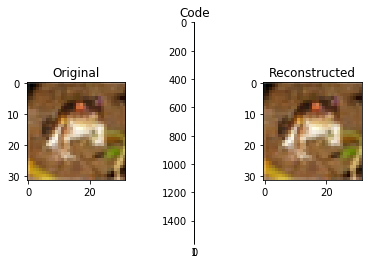

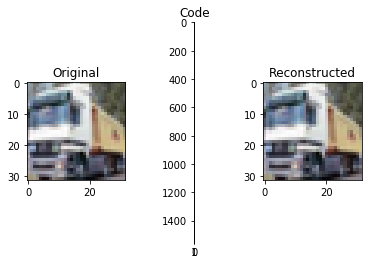

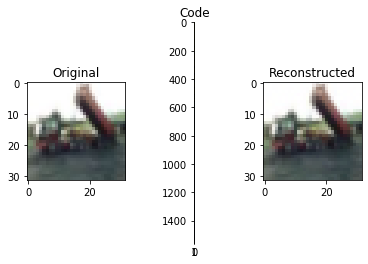

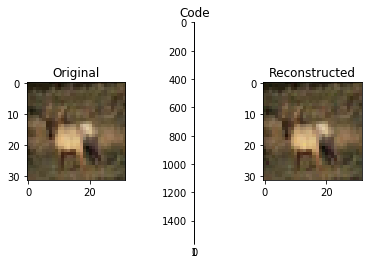

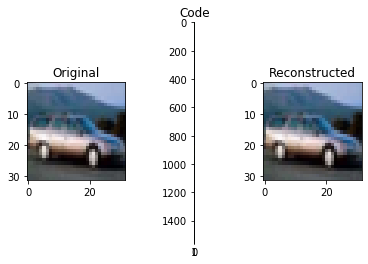

In [12]:
for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [13]:
def mse(img):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    err = np.sum((img.astype("float") - reco.astype("float")) ** 2)
    err /= float(img.shape[0] * img.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [14]:
err = []
for i in range(50):
    img = X_test[i]
    err = np.append(err,mse(img))

In [15]:
print('MSE calculated from compressed image and original image:')
print(np.sum(err))

MSE calculated from compressed image and original image:
0.001691705106822257


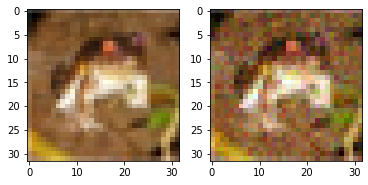

In [16]:
plt.subplot(1,2,1)
show_image(X_train[0])
plt.subplot(1,2,2)
show_image(apply_gaussian_noise(X_train[:1],sigma=0.05)[0])

In [17]:
def visualizenoise(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Image with Noise")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco) 
    plt.show()

### <span style='font-family:"Times New Roman"'>Adding Gaussian Noise:

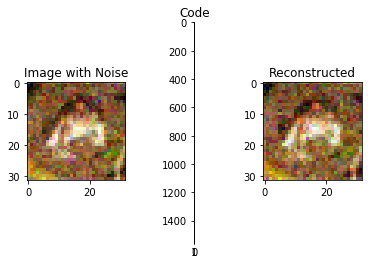

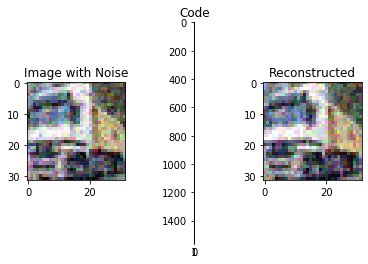

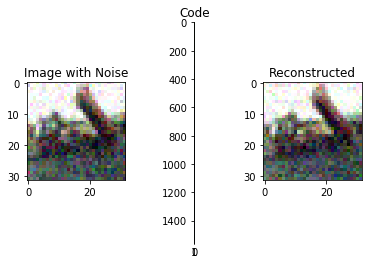

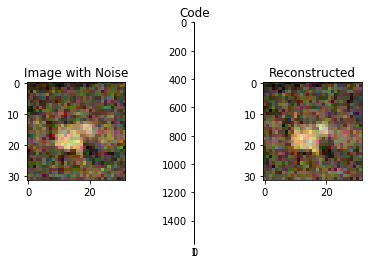

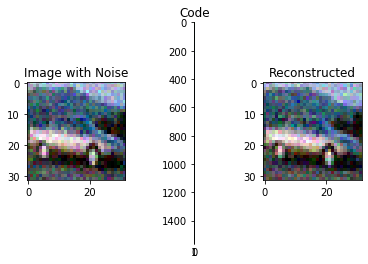

In [18]:
X_test_noise = apply_gaussian_noise(X_test)
for i in range(5):
    img = X_test_noise[i]
    visualizenoise(img,encoder,decoder)

In [19]:
def mse(img):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    err = np.sum((img.astype("float") - reco.astype("float")) ** 2)
    err /= float(img.shape[0] * img.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [20]:
err = []
for i in range(50):
    img = X_test_noise[i]
    err = np.append(err,mse(img))

In [21]:
print('MSE calculated from noisy image and original image:')
print(np.sum(err))

MSE calculated from noisy image and original image:
2.4227983839350276
